In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import os
import csv
from statistics import mean

In [2]:
T, sigma, sigma_c, p = sp.symbols("T sigma sigma_c p")
e = sp.exp(-1/T)
tau = T*e*sp.exp((sigma_c/(sigma*T))-1)
tau

T*exp(-1/T)*exp(-1 + sigma_c/(T*sigma))

In [3]:
inner1 = sp.ln((T*e)+tau)
inner2 =  (1/tau)*(-T*e*sp.ln(T*e) + (T*e + tau)*sp.ln(T*e + tau) - tau)
inner = inner1 - inner2

g_f = 1 - (2/(sp.ln((T*e)+tau)-sp.ln(T*e)))*inner
g_f

1 - 2*(log(T*exp(-1/T)*exp(-1 + sigma_c/(T*sigma)) + T*exp(-1/T)) - (-T*exp(-1/T)*exp(-1 + sigma_c/(T*sigma)) - T*exp(-1/T)*log(T*exp(-1/T)) + (T*exp(-1/T)*exp(-1 + sigma_c/(T*sigma)) + T*exp(-1/T))*log(T*exp(-1/T)*exp(-1 + sigma_c/(T*sigma)) + T*exp(-1/T)))*exp(1/T)*exp(1 - sigma_c/(T*sigma))/T)/(-log(T*exp(-1/T)) + log(T*exp(-1/T)*exp(-1 + sigma_c/(T*sigma)) + T*exp(-1/T)))

In [4]:
L = sp.symbols("L", cls=sp.Function)
L = (sp.ln(T*e + tau) - sp.ln(T*e + (1-p)*tau)) / (sp.ln(T*e + tau) - sp.ln(T*e))
L

def k_index(L, tau_val, T_val, sigma_val, sigma_c_val):
  delta = 0.001
  k = 0.5
  while (True):
    L_val = L.subs([(p, k), (tau, tau_val), (T, T_val), (sigma, sigma_val), (sigma_c, sigma_c_val)]).evalf()
    #above line gives the Lorentz curve value at a p
    if (1-k) - L_val <= 0:
      return k
    k = k + delta
    if k >= 1:
      print("Cound not find k index")
      break

In [5]:

dir_name = 'g_results/'
li = os.listdir(dir_name)

sim_gy=[]


for f_name in li:
    array1 = []
    file_name = dir_name + f_name
    with open(file_name) as file:
        reader = csv.reader(file, delimiter=' ')
        f_no = 0
        for row in reader:
            f_no=f_no+1
            if f_no==10001:
                break
            array1.append(float(row[1]))
    print(f_name, ", ", len(array1))
    sim_gy.append(mean(array1))

t.1.txt ,  2000
t.2.txt ,  2000
t.3.txt ,  2000
t.4.txt ,  2000
t.5.txt ,  2000
t.6.txt ,  2000
t.7.txt ,  2000
t.8.txt ,  2000
t.9.txt ,  2000


In [6]:
dir_name = 'k_results/'
li = os.listdir(dir_name)

sim_ky=[]

for f_name in li:
    array1 = []
    file_name = dir_name + f_name
    with open(file_name) as file:
        reader = csv.reader(file, delimiter=' ')
        f_no = 0
        for row in reader:
            f_no=f_no+1
            if f_no==10001:
                break
            array1.append(float(row[1]))
    print(f_name, ", ", len(array1))
    sim_ky.append(mean(array1))

t.1.txt ,  2028
t.2.txt ,  2000
t.3.txt ,  2000
t.4.txt ,  2000
t.5.txt ,  2000
t.6.txt ,  2000
t.7.txt ,  2000
t.8.txt ,  2000
t.9.txt ,  2000


In [7]:
sigma_val  = 0.3
sigma_c_val= 0.89
mean_g_list = []
x_list = []
i=0.01
while i<1:
  tau_val = tau.subs([(T, i), (sigma, sigma_val), (sigma_c, sigma_c_val)])
  g_f_val = g_f.subs([(tau, tau_val), (T, i), (sigma, sigma_val), (sigma_c, sigma_c_val)])
  x_list.append(i)
  mean_g_list.append(g_f_val)
  i=i + 0.01

In [8]:
mean_k_list = []
i=0.01
while(i<=1):
  tau_val = tau.subs([(T, i), (sigma, sigma_val), (sigma_c, sigma_c_val)])
  mean_k_list.append(k_index(L, tau_val, i, sigma_val, sigma_c_val))
  i=i+0.01


In [9]:
sigma_val  = 0.3
sigma_c_val= 0.5
cri_g_list = []
i=0.01
while i<1:
  tau_val = tau.subs([(T, i), (sigma, sigma_val), (sigma_c, sigma_c_val)])
  g_f_val = g_f.subs([(tau, tau_val), (T, i), (sigma, sigma_val), (sigma_c, sigma_c_val)])
  cri_g_list.append(g_f_val)
  i=i + 0.01

In [10]:
cri_k_list = []
i=0.01
while i<1:
  tau_val = tau.subs([(T, i), (sigma, sigma_val), (sigma_c, sigma_c_val)])
  cri_k_list.append(k_index(L, tau_val, i, sigma_val, sigma_c_val))
  i=i + 0.01
%store x_list mean_k_list cri_k_list mean_g_list cri_g_list sim_gy sim_ky

Stored 'x_list' (list)
Stored 'mean_k_list' (list)
Stored 'cri_k_list' (list)
Stored 'mean_g_list' (list)
Stored 'cri_g_list' (list)
Stored 'sim_gy' (list)
Stored 'sim_ky' (list)


Text(0.2, 0.15, '$\\lambda$=1, $\\kappa$=3')

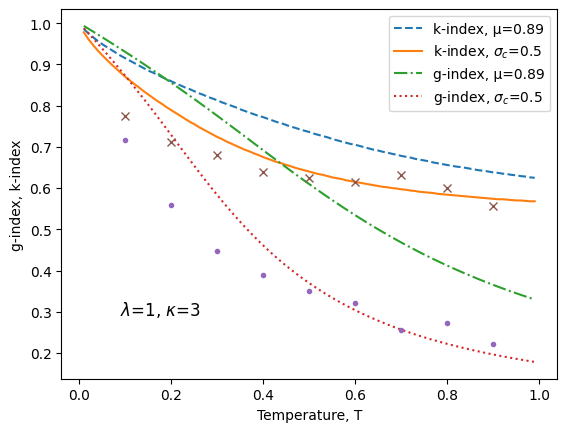

In [2]:
%store -r x_list mean_k_list cri_k_list mean_g_list cri_g_list sim_gy sim_ky
sim_x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.plot(x_list, mean_k_list, "--")
plt.plot(x_list, cri_k_list, "-")
plt.plot(x_list, mean_g_list, "-.")
plt.plot(x_list, cri_g_list, ":")
plt.plot(sim_x, sim_gy, '.',)
plt.plot(sim_x, sim_ky, 'x')


plt.xlabel("Temperature, T")
plt.ylabel("g-index, k-index")
#plt.ylabel("g-index, k-index")
plt.legend(["k-index, \u03BC=0.89", "k-index, "+ r'$\sigma_{c}$' + "=0.5", "g-index, \u03BC=0.89", "g-index, "+ r'$\sigma_{c}$' + "=0.5"])
plt.title(r'$\lambda$'+'=1, $\kappa$=3', y=0.15, x=0.2)